In [1]:
# Importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas as pd
import time
import matplotlib.pyplot as plt 
import seaborn as sns

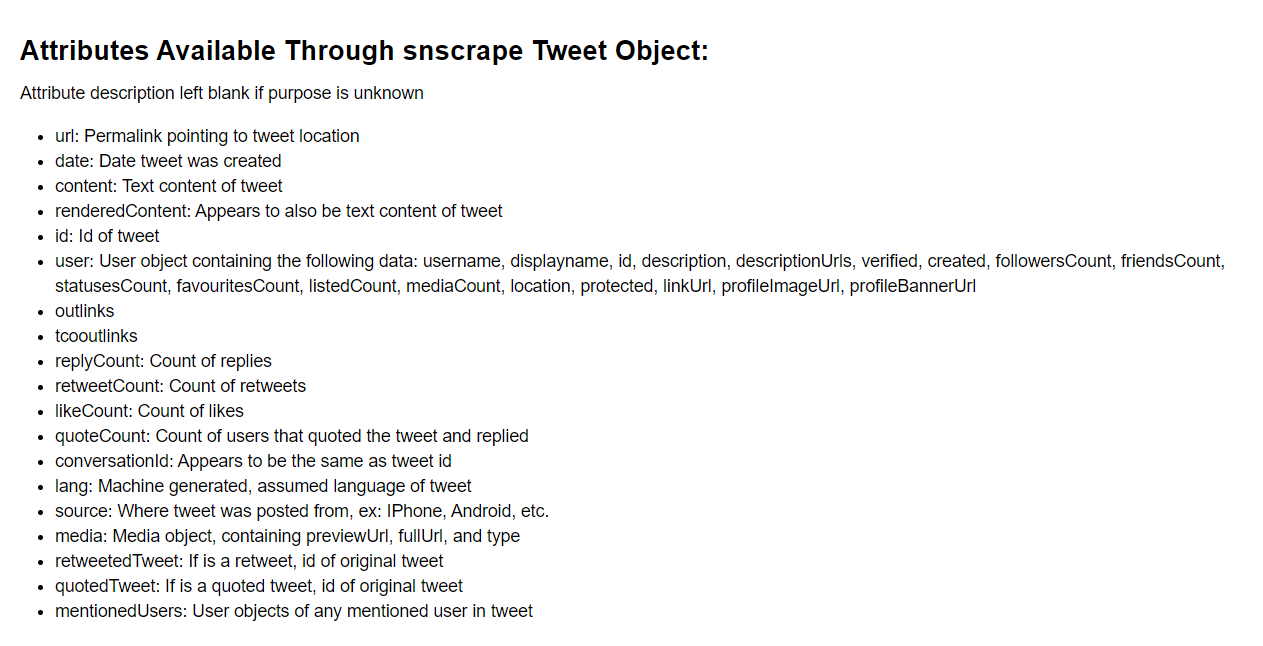

In [2]:
start_time = time.time()

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list > O termo pode ser composto. ex: COVID Vaccine
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('ukraine since:2021-02-01 until:2022-05-31').get_items()):
    if i > 5000:
        break
    tweets_list2.append([tweet.date, 
                         tweet.id, 
                         tweet.content, 
                         tweet.user.username,
                         tweet.mentionedUsers,
                         tweet.retweetedTweet,
                         tweet.likeCount,
                         tweet.retweetCount,
                         tweet.user.location,
                         tweet.user.followersCount,
                         tweet.user.verified])
    
# Creating a dataframe from the tweets list above
ukraine = pd.DataFrame(tweets_list2, columns=['Datetime', 
                                          'Tweet Id', 
                                          'Text', 
                                          'Username',
                                          'MentionedUsers',
                                          'retweetedTweet',
                                          'Likes',
                                          'Retweets',
                                          'Location',
                                          'Followers',
                                          'Verified'])

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

Result calculated in 702.6594305038452 sec


In [3]:
# Vou começar a tirar o id, não ajuda em nada na análise por enquanto

ukraine

,Datetime,Tweet Id,Text,Username,MentionedUsers,retweetedTweet,Likes,Retweets,Location,Followers,Verified
0,2022-02-27 02:17:41+00:00,1497757800688062467,We have to say that Putin is held in such high...,Balancing_Actor,None,None,0,0,,265,False
1,2022-02-27 02:17:41+00:00,1497757800595873793,@ChrisCoons @WhiteHouse You mean China joke Jo...,Michael02253267,"[https://twitter.com/ChrisCoons, https://twitt...",None,0,0,,0,False
2,2022-02-27 02:17:41+00:00,1497757799564128257,@InvestigatorCps @Bloodproveslife There is of ...,Freebird19671,"[https://twitter.com/InvestigatorCps, https://...",None,0,0,Anticorruption Elegimus (AE),484,False
3,2022-02-27 02:17:40+00:00,1497757799203360772,@justino_paz2 The Republic of Donbas has a rig...,TaiyoSirajDavis,[https://twitter.com/justino_paz2],None,0,0,"Osaka-shi Tennoji-ku, Osaka",193,False
4,2022-02-27 02:17:40+00:00,1497757798582603776,I hope #Anonymous honors the @ZelenskyyUa requ...,Kierstyns_Mom,[https://twitter.com/ZelenskyyUa],None,0,0,"Winter Springs, FL",34,False
...,...,...,...,...,...,...,...,...,...,...,...
4996,2022-02-27 02:11:04+00:00,1497756135134310401,@Kasparov63 This is a disgusting display of we...,zoobatz,[https://twitter.com/Kasparov63],None,0,0,,36,False
4997,2022-02-27 02:11:04+00:00,1497756134761021448,@RJ_Phoenix16 @sahouraxo Because Ukraine feels...,pcgonenuts,"[https://twitter.com/RJ_Phoenix16, https://twi...",None,0,0,"South East, England, UK",747,False
4998,2022-02-27 02:11:04+00:00,1497756134735859712,@NESoule @AymanM You have to take the full vid...,mike5248527271,"[https://twitter.com/NESoule, https://twitter....",None,0,0,,11,False
4999,2022-02-27 02:11:04+00:00,1497756134618406915,Breaking!! Will keep and eye on this to see if...,Summer__Camp,None,None,1,0,,49,False


In [5]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(ukraine)
profile

In [ ]:
# Salvando relatório

profile.to_file(output_file="ukraine.tweets_report.html")